# Pregunta 5

¿Que relacion existe entre la situacion de egreso de los estudiantes, y los resultados de la admision a la educacion superior?

Importacion e abrir datos provenientes del modulo Lecutra_Archivos

In [7]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os
from copy import deepcopy as dcopy


In [8]:
with open('pkl-data/adm_lista.pkl', 'rb') as lectura:
    adm = pickle.load(lectura)

In [9]:
carpeta = 'pkl-data'
archivo = "total_por_egr.pkl"
with open('pkl-data/total_por_egr.pkl', 'rb') as lectura:
    total_por_egr = pickle.load(lectura)
    carpeta = 'pkl-data'
    
    
archivo = "mat_por_egr.pkl"
with open('pkl-data/mat_por_egr.pkl', 'rb') as lectura:
    mat_por_egr = pickle.load(lectura)
    
archivo = "pond_prom.pkl"
with open('pkl-data/pond_prom.pkl', 'rb') as lectura:
    pond_prom = pickle.load(lectura)

In [10]:
adm[0]

,ID_aux,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,PROM_NOTAS,PTJE_NEM
0,id_001160071115,3,T1,1,1,201.0,469,457,437,426,63,682
1,id_0016900171627,3,H2,5,3,240.0,492,457,513,0,53,481
2,id_0016900571641,3,T1,5,2,225.0,391,442,0,396,48,376
3,id_0028900472899,3,H1,1,8,415.0,353,487,402,0,48,373
4,id_004500078456,2,H2,1,10,510.0,430,425,451,0,54,501
...,...,...,...,...,...,...,...,...,...,...,...,...
153977,id_9980999078023,3,H1,5,5,302.0,492,322,311,0,54,496
153978,id_998409971843,3,H3,2,13,NaN,461,258,576,0,52,460
153979,id_9991599279193,2,H1,1,9,490.0,414,492,0,474,57,558
153980,id_9991999579165,3,T1,5,5,314.0,538,524,499,451,47,356


In [11]:
df_p5 = (
    total_por_egr.merge(mat_por_egr, on='SIT_EGRESO_STR', how='left').fillna({'n_matriculados': 0})
    .merge(pond_prom, on='SIT_EGRESO_STR', how='left')
    .assign(**{'tasa_matricula_%': lambda d: (d['n_matriculados'] / d['n_total']) * 100})
    .sort_values('tasa_matricula_%', ascending=False)
)

display(df_p5)

,SIT_EGRESO_STR,n_total,n_matriculados,promedio_ptje_ponderado,tasa_matricula_%
6,7,695,179,641.953073,25.755396
4,5,1659394,326029,603.219285,19.647474
2,3,459,83,666.982289,18.082789
0,1,3750497,526498,621.139060,14.038086
5,6,20153,1950,577.620415,9.675979
7,8,4577,411,610.987105,8.979681
1,2,17723,1562,578.841364,8.813406
3,4,1738,39,623.351282,2.243959


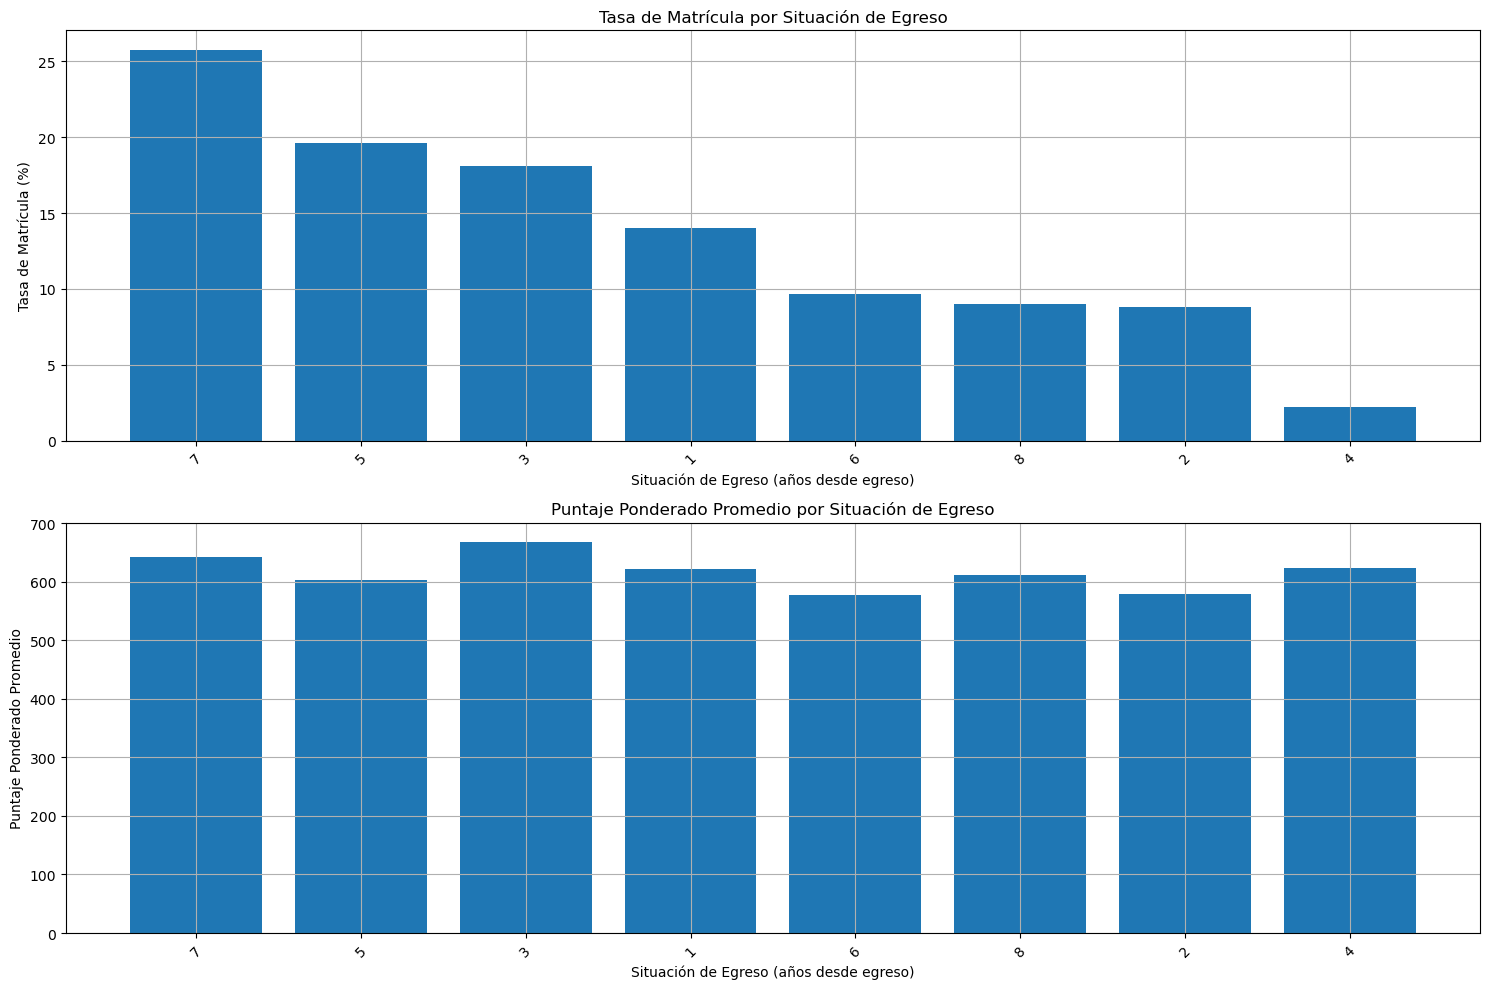

In [12]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.grid'] = True
plt.figure()

# Gráfico para tasa de matrícula por situación de egreso
plt.subplot(2, 1, 1)
plt.bar(df_p5['SIT_EGRESO_STR'], df_p5['tasa_matricula_%'])
plt.title('Tasa de Matrícula por Situación de Egreso')
plt.xlabel('Situación de Egreso (años desde egreso)')
plt.ylabel('Tasa de Matrícula (%)')
plt.xticks(rotation=45)

# Gráfico de puntajes promedio por situación de egreso
plt.subplot(2, 1, 2)
plt.bar(df_p5['SIT_EGRESO_STR'], df_p5['promedio_ptje_ponderado'])
plt.title('Puntaje Ponderado Promedio por Situación de Egreso')
plt.xlabel('Situación de Egreso (años desde egreso)')
plt.ylabel('Puntaje Ponderado Promedio')
plt.xticks(rotation=45)
ruta = os.path.join('graficos-imagenes', 'pregunta5.png')
plt.savefig(ruta)
plt.tight_layout()
plt.show()

### HALLAZGOS PRINCIPALES:
- Mayor tasa de matrícula: 25.8% (Situación: 7)
- Menor tasa de matrícula: 2.2% (Situación: 4)
- Puntaje promedio más alto: 667.0 (Situación: 3)

### CORRELACIONES:
- Correlación años desde egreso vs tasa de matrícula: 0.161
- Correlación años desde egreso vs puntaje promedio: -0.042

### CONCLUSIÓN:
La relación entre situación de egreso y resultados de admisión muestra que los recién egresados (0 años) tienen mejores resultados tanto en tasas de matrícula como en puntajes, a su vez existe una tendencia descendente en ambos indicadores a medida que aumentan los años desde el egreso. La brecha más significativa se observa entre recién egresados y quienes llevan más tiempo fuera del sistema escolar, los datos sugieren que el tiempo transcurrido desde el egreso tiene un impacto negativo en las oportunidades de acceso a la educación superior